# Loading Required Libraries

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import string
import regex as re
from sklearn.pipeline import Pipeline
import nltk

# Loading Training Data

In [120]:
twitter_data=pd.read_csv('train.csv')

# Data Description

In [121]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Dropping Unwanted Columns
- locations
- id
- keywords

In [122]:
twitter_data.drop(columns=['location','id'],inplace=True)
twitter_data.dropna(inplace=True)
twitter_data.reset_index(inplace=True,drop=True)

# Final DataFrame Having
- Feature - Text(column)
- target - target(column)

In [123]:
twitter_data.head()

,keyword,text,target
0,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
1,ablaze,We always try to bring the heavy. #metal #RT h...,0
2,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
3,ablaze,Crying out for more! Set me ablaze,0
4,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


# Disasterous Vs Non_Disasterous Taget Count

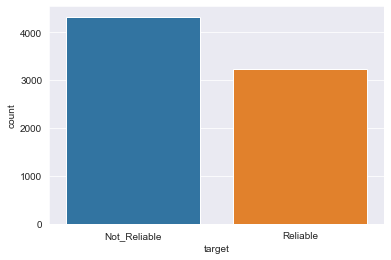

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target',data=twitter_data)
plt.xticks([0,1],['Not_Reliable','Reliable'])
plt.show()

# Rellabling All Mislabeled Data

In [125]:
df_mislabeled = twitter_data.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire is surrounded by desires so be careful and don\x89Ûªt let your desires control you! #Afterlife',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'To fight bioterrorism sir.',
 'He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam',
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'wowo--=== 12000 Nigerian refugees repatriated from Cameroon',
 'RT NotExplained: The onl

# After Relabaling of Data

In [126]:
twitter_data['target_relabeled'] = twitter_data['target'].copy() 

twitter_data.loc[twitter_data['text'] == 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit', 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife', 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
twitter_data.loc[twitter_data['text'] == 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring', 'target_relabeled'] = 1
twitter_data.loc[twitter_data['text'] == '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption', 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!', 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE', 'target_relabeled'] = 1
twitter_data.loc[twitter_data['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
twitter_data.loc[twitter_data['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "wowo--=== 12000 Nigerian refugees repatriated from Cameroon", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
twitter_data.loc[twitter_data['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
twitter_data.loc[twitter_data['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time", 'target_relabeled'] = 0

# Data Cleaning Function
- Removes all url's from text
- Removes all html tags from text
- Removes all emojis from text
- Removes punctuations
- Remove Stopwords
- Tokenize text

In [127]:
stopwords= nltk.corpus.stopwords.words('english')
sn=nltk.SnowballStemmer('english')
content=" "
def clean_text(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    text=url.sub(r'',text)
    html=re.compile(r'<.*?>')
    text=html.sub(r'',text)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r'',text)
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[sn.stem(word) for word in tokens if word not in stopwords]
    return text

twitter_data['cleaned_text']=twitter_data['text'].apply(lambda x:clean_text(x))
twit_no_dist=[i for i in twitter_data[twitter_data.target==0]['keyword'].dropna()]
twit_dist=[i for i in twitter_data[twitter_data.target==1]['keyword'].dropna()]
content_no_dist=" ".join(twit_no_dist)
content_dist=" ".join(twit_dist)

# After Data Cleaning

In [128]:
twitter_data.head()

,keyword,text,target,target_relabeled,cleaned_text
0,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,1,"[bbcmtd, wholesal, market, ablaz, ]"
1,ablaze,We always try to bring the heavy. #metal #RT h...,0,0,"[alway, tri, bring, heavi, metal, rt, ]"
2,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,1,"[africanbaz, break, newsnigeria, flag, set, ab..."
3,ablaze,Crying out for more! Set me ablaze,0,0,"[cri, set, ablaz]"
4,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,"[plus, side, look, sky, last, night, ablaz, ]"


# WordCloud Figure For Disasterous Tweets

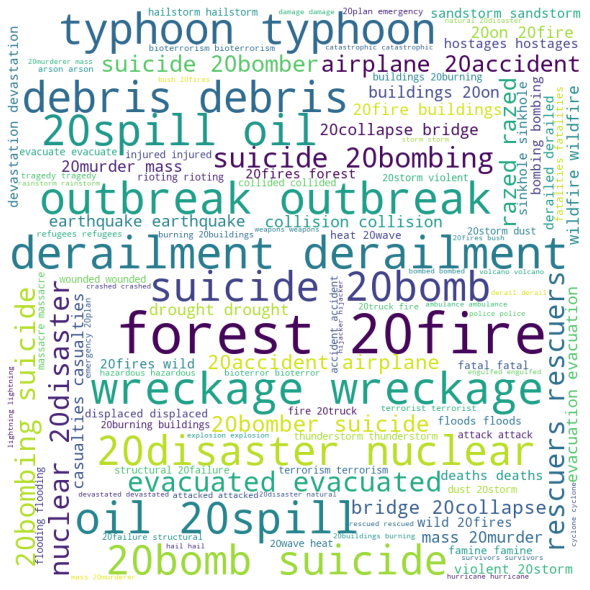

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(content_dist)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# WordCloud Figure For Non-Disasterous Tweets

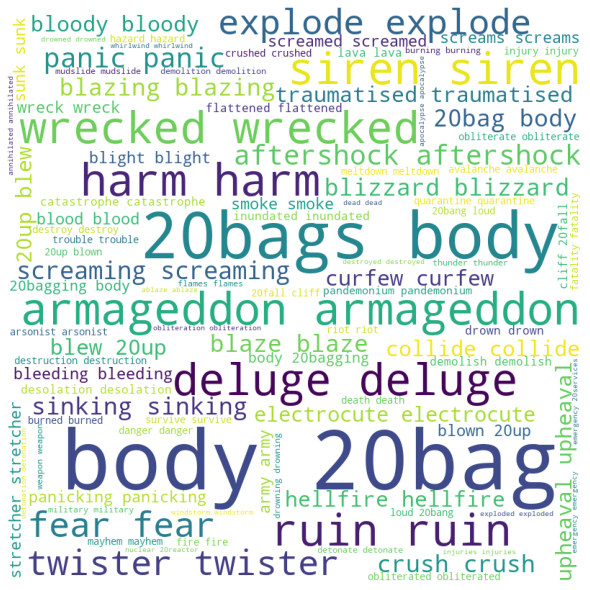

In [130]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(content_no_dist)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Most Frequent Words In Non-Disasterous Tweets

In [131]:
words_count_non_dist=twitter_data[twitter_data.target==0]['keyword'].value_counts().to_frame()
words_count_non_dist.reset_index(inplace=True)
words_count_non_dist.head()

,keyword,count
0,body%20bags,40
1,harm,37
2,armageddon,37
3,wrecked,36
4,ruin,36


# Most Frequent Words In Disasterous Tweets

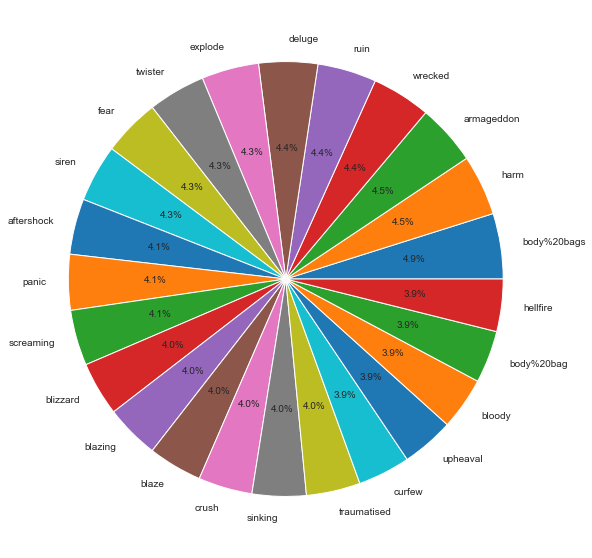

In [132]:
label_non_dist=words_count_non_dist[words_count_non_dist['count']>31]['keyword']
plt.figure(figsize=(10,10))
plt.pie(words_count_non_dist[words_count_non_dist['count']>31]['count'],labels=label_non_dist,autopct='%0.1f%%')
plt.show()

In [133]:
words_count_dist=twitter_data[twitter_data.target==1]['keyword'].value_counts().to_frame()
words_count_dist.reset_index(inplace=True)
words_count_dist.head()

,keyword,count
0,derailment,39
1,wreckage,39
2,outbreak,39
3,debris,37
4,oil%20spill,37


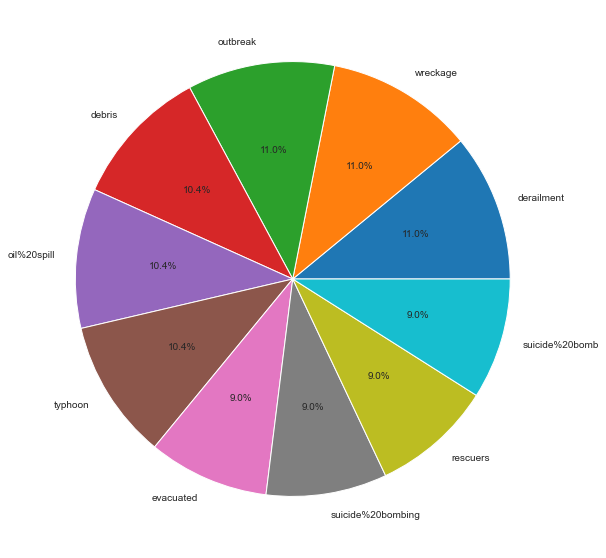

In [134]:
label_non_dist=words_count_dist[words_count_dist['count']>31]['keyword']
plt.figure(figsize=(10,10))
plt.pie(words_count_dist[words_count_dist['count']>31]['count'],labels=label_non_dist,autopct='%0.1f%%')
plt.show()

In [135]:
twitter_data['keyword_list_format']=twitter_data.keyword.apply(lambda x:[x])
twitter_data['text_list']=twitter_data.keyword_list_format+twitter_data.cleaned_text
twitter_data['text_to_procces']=twitter_data['text_list'].apply(lambda x:' '.join(x))

In [136]:
twitter_data.head(5)

,keyword,text,target,target_relabeled,cleaned_text,keyword_list_format,text_list,text_to_procces
0,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,1,"[bbcmtd, wholesal, market, ablaz, ]",[ablaze],"[ablaze, bbcmtd, wholesal, market, ablaz, ]",ablaze bbcmtd wholesal market ablaz
1,ablaze,We always try to bring the heavy. #metal #RT h...,0,0,"[alway, tri, bring, heavi, metal, rt, ]",[ablaze],"[ablaze, alway, tri, bring, heavi, metal, rt, ]",ablaze alway tri bring heavi metal rt
2,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,1,"[africanbaz, break, newsnigeria, flag, set, ab...",[ablaze],"[ablaze, africanbaz, break, newsnigeria, flag,...",ablaze africanbaz break newsnigeria flag set a...
3,ablaze,Crying out for more! Set me ablaze,0,0,"[cri, set, ablaz]",[ablaze],"[ablaze, cri, set, ablaz]",ablaze cri set ablaz
4,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,"[plus, side, look, sky, last, night, ablaz, ]",[ablaze],"[ablaze, plus, side, look, sky, last, night, a...",ablaze plus side look sky last night ablaz


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vect=TfidfVectorizer(analyzer=clean_text)
text_vector=tfid_vect.fit_transform(twitter_data['text_to_procces'])

In [138]:
x_counts_df= pd.DataFrame(text_vector.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,14594,14595,14596,14597,14598,14599,14600,14601,14602,14603
0,0.077222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.085948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.065232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.072260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7549,0.057505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,0.060633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Test Split
- Test_size=20%
- Train_size=80%

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(twitter_data.text_to_procces,twitter_data.target,test_size=0.2,shuffle=True,stratify=twitter_data.target)

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [141]:
model=Pipeline(
    [
     ('Text_Preprocessing',TfidfVectorizer(analyzer=clean_text)),
     ('NB',MultinomialNB())
    ]
)

In [142]:
model.fit(X_train,y_train)

Pipeline(steps=[('Text_Preprocessing',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001DB933FC550>)),
                ('NB', MultinomialNB())])

In [143]:
model.score(X_test,y_test)

0.8034414295168762

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


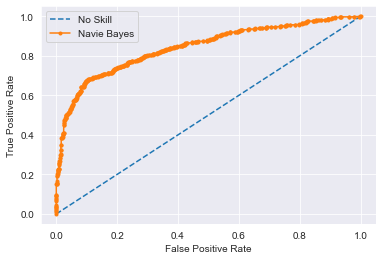

In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test ,lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Navie Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [145]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,model.predict(X_test)))    

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       865
           1       0.84      0.67      0.74       646

    accuracy                           0.80      1511
   macro avg       0.81      0.79      0.79      1511
weighted avg       0.81      0.80      0.80      1511



In [146]:
confusion_matrix(y_test,model.predict(X_test))

array([[781,  84],
       [213, 433]], dtype=int64)

In [147]:
# import numpy as np
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# from plot_metric.functions import BinaryClassification
# # Visualisation with plot_metric
# bc = BinaryClassification(y_test, np.round(model.predict(X_test)), labels=['Disaster','Not Disaster'])

# # Figures
# plt.figure(figsize=(14,7))
# bc.plot_roc_curve()
# plt.show()